# Travelers Case Competition
### Name: Juan Villegas                                                       
### Date: 2/24/23

## Importing Claims Data Set & python packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Claim_final.csv')
df.index = df.index + 1
df

,Unnamed: 0,CLM_NBR,NBR_OF_CLMT,BI_CLMT_CNT,COV_RGST_DT,CLAIM_EXPENSE_EST_AMT,CLAIM_INDEMNITY_EST_AMT,POL_NBR,POLICY_STATE,PRI_BTH_DT
1,0,YB85Q6L,1,2,5/29/2018,903.0,1522,991120685,NY,6/22/1960
2,1,VUC6B3X,1,2,11/28/2016,0.0,10093,993950729,FL,12/1/1944
3,6,EKICR4W,1,1,5/10/2018,156.0,75055,998685688,SC,6/10/1972
4,12,Y9TIRJH,2,1,12/11/2019,0.0,5576,994335003,FL,3/20/1988
5,16,YZKNJDD,1,3,7/7/2018,9129.0,13133,996569175,FL,9/15/1949
...,...,...,...,...,...,...,...,...,...,...
1568,8626,WFYQ1JA,2,2,8/14/2012,1538.0,15998,994818470,GA,1/17/1972
1569,8628,8E96SU4,1,2,11/30/2019,0.0,3622,998289730,MN,11/9/1990
1570,8636,E6SQLM4,1,2,8/5/2018,0.0,225,996057487,NaN,1/31/1971
1571,8638,INREQCC,1,1,12/11/2013,0.0,22465,997595122,PA,3/13/1949


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df

,CLM_NBR,NBR_OF_CLMT,BI_CLMT_CNT,COV_RGST_DT,CLAIM_EXPENSE_EST_AMT,CLAIM_INDEMNITY_EST_AMT,POL_NBR,POLICY_STATE,PRI_BTH_DT
1,YB85Q6L,1,2,5/29/2018,903.0,1522,991120685,NY,6/22/1960
2,VUC6B3X,1,2,11/28/2016,0.0,10093,993950729,FL,12/1/1944
3,EKICR4W,1,1,5/10/2018,156.0,75055,998685688,SC,6/10/1972
4,Y9TIRJH,2,1,12/11/2019,0.0,5576,994335003,FL,3/20/1988
5,YZKNJDD,1,3,7/7/2018,9129.0,13133,996569175,FL,9/15/1949
...,...,...,...,...,...,...,...,...,...
1568,WFYQ1JA,2,2,8/14/2012,1538.0,15998,994818470,GA,1/17/1972
1569,8E96SU4,1,2,11/30/2019,0.0,3622,998289730,MN,11/9/1990
1570,E6SQLM4,1,2,8/5/2018,0.0,225,996057487,NaN,1/31/1971
1571,INREQCC,1,1,12/11/2013,0.0,22465,997595122,PA,3/13/1949


### Data description

In [4]:
records = df.shape[0]
columns = df.shape[1]
print(f'This Data set has {columns} columns and {records} records.')

This Data set has 9 columns and 1572 records.


In [5]:
df.head(3)

,CLM_NBR,NBR_OF_CLMT,BI_CLMT_CNT,COV_RGST_DT,CLAIM_EXPENSE_EST_AMT,CLAIM_INDEMNITY_EST_AMT,POL_NBR,POLICY_STATE,PRI_BTH_DT
1,YB85Q6L,1,2,5/29/2018,903.0,1522,991120685,NY,6/22/1960
2,VUC6B3X,1,2,11/28/2016,0.0,10093,993950729,FL,12/1/1944
3,EKICR4W,1,1,5/10/2018,156.0,75055,998685688,SC,6/10/1972


# Lets understand what the codes in our columns mean:

- **CLM_NBR:**	A system-generated number that identifies a claim. It is unique within WC and APL... A Unique Key


- **NBR_OF_CLMT:**	The number of claimants on a claim.


- **BI_CLMT_CNMT:**	The number of claimants on a claim that are for Bodily Injury.


- **COV_RGST_DT:**	The date on which the claim was registered to the policy.


- **CLAIM_EXPENSE_EST_AMT:**	The amount of the Allocated Loss Adjustment Expense (ALAE) incurred amount summarized at the claim level.


- **CLAIM_INDEMNITY_EST_AMT:**  Estimated Amount Insurance Company has to pay out


- **POL_NBR:**	The insurance policy #.


- **POLICY_STATE:**	The primary state of an insurance policy


- **PRI_BTH_DT:**	The date of birth of the individual filing a claim.


In [6]:
print(f"This data set has {columns} Attributes.")
print()
print()
for i, column in enumerate(df.columns):
    print(f'Column #{i + 1} - {column}:')
    print(f'# of Unique Values in this field: {df[column].nunique()}\n')
    print(f'Unique Values & Count: \n {df[column].value_counts() }\n')
    print()

This data set has 9 Attributes.


Column #1 - CLM_NBR:
# of Unique Values in this field: 1572

Unique Values & Count: 
 YB85Q6L    1
ZENWO66    1
QMU42PG    1
WN4CAIN    1
2D4XWHT    1
          ..
UITHEZW    1
IYE55NQ    1
7OBUMVM    1
765ZRBY    1
U24GIY9    1
Name: CLM_NBR, Length: 1572, dtype: int64


Column #2 - NBR_OF_CLMT:
# of Unique Values in this field: 7

Unique Values & Count: 
 1    1163
2     237
3     115
4      41
5      12
6       3
8       1
Name: NBR_OF_CLMT, dtype: int64


Column #3 - BI_CLMT_CNT:
# of Unique Values in this field: 10

Unique Values & Count: 
 1     895
2     398
3     135
4      77
5      39
6      16
7       5
9       4
8       2
10      1
Name: BI_CLMT_CNT, dtype: int64


Column #4 - COV_RGST_DT:
# of Unique Values in this field: 1132

Unique Values & Count: 
 10/15/2018    7
2/12/2019     5
9/15/2017     5
11/28/2016    5
9/4/2013      4
             ..
5/17/2017     1
8/17/2014     1
7/23/2016     1
7/6/2015      1
10/30/2014    1
Name: COV_RGST

### Now lets see where we are missing values in our dataset

In [7]:
df.isna().sum()

CLM_NBR                     0
NBR_OF_CLMT                 0
BI_CLMT_CNT                 0
COV_RGST_DT                 0
CLAIM_EXPENSE_EST_AMT      14
CLAIM_INDEMNITY_EST_AMT     0
POL_NBR                     0
POLICY_STATE               18
PRI_BTH_DT                  0
dtype: int64

### Let's pull these rows and investigate them

In [8]:
na_rows = df[df.isna().any(axis=1)]
na_rows

,CLM_NBR,NBR_OF_CLMT,BI_CLMT_CNT,COV_RGST_DT,CLAIM_EXPENSE_EST_AMT,CLAIM_INDEMNITY_EST_AMT,POL_NBR,POLICY_STATE,PRI_BTH_DT
24,G3UQ48U,1,1,1/23/2020,NaN,21118,998647822,AL,8/22/1955
112,XC0SK0D,2,1,9/7/2018,0.0,11219,990181188,NaN,1/25/1997
120,H7PQV5Y,1,1,9/27/2013,NaN,44526,998327569,FL,1/10/1983
188,M1L7FGN,2,1,7/9/2018,195.0,58914,991609054,NaN,7/2/1985
285,5HHBA7O,1,5,11/17/2017,0.0,55146,991517758,NaN,12/14/1946
314,GA68GXR,1,1,1/28/2019,NaN,67,994439251,PA,7/22/1988
368,3GVL9MC,1,1,8/2/2013,2.0,11676,997735705,NaN,9/12/1983
490,HHHIYKD,1,1,2/10/2018,0.0,3266,991407980,NaN,4/20/1994
522,UITHEZW,2,2,3/25/2019,0.0,10575,996552171,NaN,7/7/1985
537,FO6VQ5Z,2,1,10/16/2014,NaN,3855,992530283,NC,9/24/1962


In [9]:
df['POLICY_STATE'].value_counts()

NY    166
FL    157
TX    146
PA    109
GA    107
SC     63
CA     61
CT     52
NJ     51
MD     43
MA     40
CO     39
NC     37
VA     35
OH     34
MN     32
WA     29
TN     29
AL     28
IL     28
20     26
AZ     25
ME     21
IN     20
MO     19
NV     19
KS     17
OR     16
KY     15
UT     12
MS     10
RI     10
WI      8
OK      8
AR      7
NH      7
DE      6
DC      5
MT      4
NE      4
ID      3
IA      2
VT      2
NM      2
Name: POLICY_STATE, dtype: int64

# Now lets import the Claimants Data Set

In [10]:
df1 = pd.read_csv('Claimant_final.csv')
df1

,Unnamed: 0,CLM_NBR,AUTO_ACCIDENT_DESC,CLAIMANT_STATUS,APPR_DAM_EST_REC_CNT,VEH_COLR_TXT,VEH_DAM_TXT,CLMT_VEH_MDL_NM,CLMT_VEH_YR,VEH_TYPE,VEH_PRIMARY_PT_OF_DAMAGE,AIRBAG_DEPLOYED,VEH_SPEED_AT_IMPACT
0,0,YB85Q6L,Multi Veh - Unclear Liab,Closed with Payment,1,BURGANDY,"D/S FRONT FENDER, D",F-350 SUPE,2003,Automobile,Driver Front Corner,None,Below 10 mph
1,1,VUC6B3X,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,UNK REAR DMG,SONATA HYB,2016,Automobile,Complete Rear End,None,Parked or Stopped
2,6,EKICR4W,Multi Veh - Unclear Liab,Closed with Payment,1,BLACK,POI: D/S DOOR WON'T,200 LX,2016,Automobile,Driver Center,None,10-20 mph
3,12,Y9TIRJH,Multi Veh - Clear Liab,Closed without Payment,1,SILVER,NONE,COROLLA CE,2007,Automobile,No Damage,None,21-50 mph
4,16,YZKNJDD,Multi Veh - Unclear Liab,Closed with Payment,2,BLUE,PRIMARY POINT OF DA,F-150 SUPE,2009,Automobile,Complete Front End,One,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,8626,WFYQ1JA,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,POI - FRONT BUMPER,MKX,2012,Automobile,Complete Front End,None,10-20 mph
1568,8628,8E96SU4,Multi Veh - Clear Liab,Closed with Payment,2,BEIGE,SUPP,ACCORD LX,2000,Automobile,Driver Front Corner,None,Unknown
1569,8636,E6SQLM4,Single Veh,Closed without Payment,1,SILVER,NO DAMAGE,FORESTER 2,2018,Automobile,No Damage,None,Below 10 mph
1570,8638,INREQCC,Multi Veh - Unclear Liab,Closed with Payment,1,SILVER,SUNROOF SHATTERED -,MURANO,2010,Automobile,All Over,More than one,Below 10 mph


In [11]:
df1 = df1.drop('Unnamed: 0', axis=1)
df1

,CLM_NBR,AUTO_ACCIDENT_DESC,CLAIMANT_STATUS,APPR_DAM_EST_REC_CNT,VEH_COLR_TXT,VEH_DAM_TXT,CLMT_VEH_MDL_NM,CLMT_VEH_YR,VEH_TYPE,VEH_PRIMARY_PT_OF_DAMAGE,AIRBAG_DEPLOYED,VEH_SPEED_AT_IMPACT
0,YB85Q6L,Multi Veh - Unclear Liab,Closed with Payment,1,BURGANDY,"D/S FRONT FENDER, D",F-350 SUPE,2003,Automobile,Driver Front Corner,None,Below 10 mph
1,VUC6B3X,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,UNK REAR DMG,SONATA HYB,2016,Automobile,Complete Rear End,None,Parked or Stopped
2,EKICR4W,Multi Veh - Unclear Liab,Closed with Payment,1,BLACK,POI: D/S DOOR WON'T,200 LX,2016,Automobile,Driver Center,None,10-20 mph
3,Y9TIRJH,Multi Veh - Clear Liab,Closed without Payment,1,SILVER,NONE,COROLLA CE,2007,Automobile,No Damage,None,21-50 mph
4,YZKNJDD,Multi Veh - Unclear Liab,Closed with Payment,2,BLUE,PRIMARY POINT OF DA,F-150 SUPE,2009,Automobile,Complete Front End,One,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,WFYQ1JA,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,POI - FRONT BUMPER,MKX,2012,Automobile,Complete Front End,None,10-20 mph
1568,8E96SU4,Multi Veh - Clear Liab,Closed with Payment,2,BEIGE,SUPP,ACCORD LX,2000,Automobile,Driver Front Corner,None,Unknown
1569,E6SQLM4,Single Veh,Closed without Payment,1,SILVER,NO DAMAGE,FORESTER 2,2018,Automobile,No Damage,None,Below 10 mph
1570,INREQCC,Multi Veh - Unclear Liab,Closed with Payment,1,SILVER,SUNROOF SHATTERED -,MURANO,2010,Automobile,All Over,More than one,Below 10 mph


In [12]:
records1 = df1.shape[0]
columns1 = df1.shape[1]
print(f'This Data set has {columns1} columns and {records1} records.')

This Data set has 12 columns and 1572 records.


# Lets understand what the codes in our columns mean:

- **CLM_NBR:**	# that identifies a claim. It is unique within WC and APL.


- **AUTO_ACCIDENT_DESC**	The Type of Accident


- **CLAIMANT_STATUS**	A code that identifies the current processing status of a claimant segment.


- **APPR_DAM_EST_REC_CNT**	The count of damage estimates performed on the claimant's vehicle.


- **VEH_COLR_TXT**	Claimants Vehicle Color.


- **VEH_DAM_TXT**	Description of where the vehcile was damaged


- **CLMT_VEH_MDL_NM**	Description of Claimants Vehicle Model


- **CLMT_VEH_YR**	The year of the vehicle.


- **VEH_TYPE**	Identifies the type of vehicl


- **VEH_PRIMARY_PT_OF_DAMAGE**	A code that identifies the primary point of damage.


- **AIRBAG_DEPLOYED**	 Identifies how many airbags were deployed in the claimants vehicle during the accident.


- **VEH_SPEED_AT_IMPACT**	Identifies how fast the vehicle was traveling at the time of the accident.


In [16]:
print(f"This data set has {columns1} Attributes.")
print()
print()
for i, column in enumerate(df1.columns):
    print(f'Column #{i + 1} - {column}:')
    print(f'# of Unique Values in this field: {df1[column].nunique()}\n')
    print(f'Unique Values & Count: \n {df1[column].value_counts() }\n')
    print()

This data set has 12 Attributes.


Column #1 - CLM_NBR:
# of Unique Values in this field: 1572

Unique Values & Count: 
 YB85Q6L    1
ZENWO66    1
QMU42PG    1
WN4CAIN    1
2D4XWHT    1
          ..
UITHEZW    1
IYE55NQ    1
7OBUMVM    1
765ZRBY    1
U24GIY9    1
Name: CLM_NBR, Length: 1572, dtype: int64


Column #2 - AUTO_ACCIDENT_DESC:
# of Unique Values in this field: 3

Unique Values & Count: 
 Multi Veh - Unclear Liab    1383
Single Veh                   155
Multi Veh - Clear Liab        34
Name: AUTO_ACCIDENT_DESC, dtype: int64


Column #3 - CLAIMANT_STATUS:
# of Unique Values in this field: 3

Unique Values & Count: 
 Closed with Payment       1163
Closed without Payment     408
Closed to Subrogation        1
Name: CLAIMANT_STATUS, dtype: int64


Column #4 - APPR_DAM_EST_REC_CNT:
# of Unique Values in this field: 8

Unique Values & Count: 
 1    1000
2     310
3     125
0     101
4      24
5       6
6       5
7       1
Name: APPR_DAM_EST_REC_CNT, dtype: int64


Column #5 - VEH_C

In [17]:
df1.isna().sum()

CLM_NBR                      0
AUTO_ACCIDENT_DESC           0
CLAIMANT_STATUS              0
APPR_DAM_EST_REC_CNT         0
VEH_COLR_TXT                14
VEH_DAM_TXT                  0
CLMT_VEH_MDL_NM              0
CLMT_VEH_YR                  0
VEH_TYPE                     0
VEH_PRIMARY_PT_OF_DAMAGE     0
AIRBAG_DEPLOYED              0
VEH_SPEED_AT_IMPACT          0
dtype: int64

In [18]:
na_rows1 = df1[df1.isna().any(axis=1)]
na_rows1

,CLM_NBR,AUTO_ACCIDENT_DESC,CLAIMANT_STATUS,APPR_DAM_EST_REC_CNT,VEH_COLR_TXT,VEH_DAM_TXT,CLMT_VEH_MDL_NM,CLMT_VEH_YR,VEH_TYPE,VEH_PRIMARY_PT_OF_DAMAGE,AIRBAG_DEPLOYED,VEH_SPEED_AT_IMPACT
174,0E9YG83,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,POI: UNK,200 LX,2011,Automobile,Driver Front Corner,One,Unknown
224,B2EFX9I,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,D/S FRONT IS DAMAGE,MEGA CAB P,2015,Automobile,Driver Front Corner,None,21-50 mph
318,JPZSJCO,Multi Veh - Unclear Liab,Closed with Payment,2,NaN,REAR BUMPER SCRATCH,COROLLA CE,2001,Automobile,Complete Rear End,None,Parked or Stopped
334,VV3C9EJ,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,POI-TAIL GATE PUNCH,TRAVERSE L,2009,Automobile,Complete Rear End,None,Below 10 mph
545,VKQMQIA,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,P/S REAR WHEEL/RIM,CIVIC LX,2012,Automobile,Passenger Rear Corner,None,21-50 mph
658,IT2I8W1,Multi Veh - Unclear Liab,Closed with Payment,2,NaN,"FRONT END, IV WAS N",ESCAPE HYB,2009,Automobile,Complete Front End,Unknown,Unknown
669,LW5BZ0L,Multi Veh - Unclear Liab,Closed with Payment,3,NaN,SCRATCH ON P/S RIGH,PILOT EX,2008,Automobile,Complete Front End,None,Below 10 mph
969,TZX9S4J,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,POI: D/S FRONT AND,EQUINOX LT,2005,Automobile,Complete Driver Side,None,Below 10 mph
1030,QQGYN1V,Multi Veh - Unclear Liab,Closed with Payment,1,NaN,"F/E DMG , P/S AND D",HIGHLANDER,2013,Automobile,Complete Front End,None,Unknown
1052,2D4XWHT,Multi Veh - Unclear Liab,Closed without Payment,0,NaN,BUMPER CRACKED TAIL,ESCAPE XLT,2012,Automobile,Complete Rear End,None,Parked or Stopped


### it looks like these 2 files are related to each other, lets see if we can merge these files together by the claim number

In [19]:
df2 = pd.merge(df, df1, on='CLM_NBR')
df2

,CLM_NBR,NBR_OF_CLMT,BI_CLMT_CNT,COV_RGST_DT,CLAIM_EXPENSE_EST_AMT,CLAIM_INDEMNITY_EST_AMT,POL_NBR,POLICY_STATE,PRI_BTH_DT,AUTO_ACCIDENT_DESC,CLAIMANT_STATUS,APPR_DAM_EST_REC_CNT,VEH_COLR_TXT,VEH_DAM_TXT,CLMT_VEH_MDL_NM,CLMT_VEH_YR,VEH_TYPE,VEH_PRIMARY_PT_OF_DAMAGE,AIRBAG_DEPLOYED,VEH_SPEED_AT_IMPACT
0,YB85Q6L,1,2,5/29/2018,903.0,1522,991120685,NY,6/22/1960,Multi Veh - Unclear Liab,Closed with Payment,1,BURGANDY,"D/S FRONT FENDER, D",F-350 SUPE,2003,Automobile,Driver Front Corner,None,Below 10 mph
1,VUC6B3X,1,2,11/28/2016,0.0,10093,993950729,FL,12/1/1944,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,UNK REAR DMG,SONATA HYB,2016,Automobile,Complete Rear End,None,Parked or Stopped
2,EKICR4W,1,1,5/10/2018,156.0,75055,998685688,SC,6/10/1972,Multi Veh - Unclear Liab,Closed with Payment,1,BLACK,POI: D/S DOOR WON'T,200 LX,2016,Automobile,Driver Center,None,10-20 mph
3,Y9TIRJH,2,1,12/11/2019,0.0,5576,994335003,FL,3/20/1988,Multi Veh - Clear Liab,Closed without Payment,1,SILVER,NONE,COROLLA CE,2007,Automobile,No Damage,None,21-50 mph
4,YZKNJDD,1,3,7/7/2018,9129.0,13133,996569175,FL,9/15/1949,Multi Veh - Unclear Liab,Closed with Payment,2,BLUE,PRIMARY POINT OF DA,F-150 SUPE,2009,Automobile,Complete Front End,One,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,WFYQ1JA,2,2,8/14/2012,1538.0,15998,994818470,GA,1/17/1972,Multi Veh - Unclear Liab,Closed with Payment,2,BLACK,POI - FRONT BUMPER,MKX,2012,Automobile,Complete Front End,None,10-20 mph
1568,8E96SU4,1,2,11/30/2019,0.0,3622,998289730,MN,11/9/1990,Multi Veh - Clear Liab,Closed with Payment,2,BEIGE,SUPP,ACCORD LX,2000,Automobile,Driver Front Corner,None,Unknown
1569,E6SQLM4,1,2,8/5/2018,0.0,225,996057487,NaN,1/31/1971,Single Veh,Closed without Payment,1,SILVER,NO DAMAGE,FORESTER 2,2018,Automobile,No Damage,None,Below 10 mph
1570,INREQCC,1,1,12/11/2013,0.0,22465,997595122,PA,3/13/1949,Multi Veh - Unclear Liab,Closed with Payment,1,SILVER,SUNROOF SHATTERED -,MURANO,2010,Automobile,All Over,More than one,Below 10 mph


In [20]:
records2 = df2.shape[0]
columns2 = df2.shape[1]
print(f'Our Merged Data set has {columns2} columns and {records} records.')

Our Merged Data set has 20 columns and 1572 records.


### Now lets get one last description of all the columns we have

- **CLM_NBR:**	A system-generated number that identifies a claim. It is unique within WC and APL... A Unique Key


- **NBR_OF_CLMT:**	The number of claimants on a claim.


- **BI_CLMT_CNMT:**	The number of claimants on a claim that are for Bodily Injury.


- **COV_RGST_DT:**	The date on which the claim was registered to the policy.


- **CLAIM_EXPENSE_EST_AMT:**	The amount of the Allocated Loss Adjustment Expense (ALAE) incurred amount summarized at the claim level.


- **CLAIM_INDEMNITY_EST_AMT:**  Estimated Amount Insurance Company has to pay out


- **POL_NBR:**	The insurance policy #.


- **POLICY_STATE:**	The primary state of an insurance policy


- **PRI_BTH_DT:**	The date of birth of the individual filing a claim.

    
- **CLM_NBR:**	# that identifies a claim. It is unique within WC and APL.


- **AUTO_ACCIDENT_DESC**	The Type of Accident


- **CLAIMANT_STATUS**	A code that identifies the current processing status of a claimant segment.


- **APPR_DAM_EST_REC_CNT**	The count of damage estimates performed on the claimant's vehicle.


- **VEH_COLR_TXT**	Claimants Vehicle Color.


- **VEH_DAM_TXT**	Description of where the vehcile was damaged


- **CLMT_VEH_MDL_NM**	Description of Claimants Vehicle Model


- **CLMT_VEH_YR**	The year of the vehicle.


- **VEH_TYPE**	Identifies the type of vehicl


- **VEH_PRIMARY_PT_OF_DAMAGE**	A code that identifies the primary point of damage.


- **AIRBAG_DEPLOYED**	 Identifies how many airbags were deployed in the claimants vehicle during the accident.


- **VEH_SPEED_AT_IMPACT**	Identifies how fast the vehicle was traveling at the time of the accident.


### Look's like it worked, now we're going to see if we can get python to make some visualizations for us

In [21]:
print(f"This data set has {columns2} Attributes.")
print()
print()
for i, column in enumerate(df2.columns):
    print(f'Column #{i + 1} - {column}:')
    print(f'# of Unique Values in this field: {df2[column].nunique()}\n')
    print(f'Unique Values & Count: \n {df2[column].value_counts() }\n')
    print()

This data set has 20 Attributes.


Column #1 - CLM_NBR:
# of Unique Values in this field: 1572

Unique Values & Count: 
 YB85Q6L    1
ZENWO66    1
QMU42PG    1
WN4CAIN    1
2D4XWHT    1
          ..
UITHEZW    1
IYE55NQ    1
7OBUMVM    1
765ZRBY    1
U24GIY9    1
Name: CLM_NBR, Length: 1572, dtype: int64


Column #2 - NBR_OF_CLMT:
# of Unique Values in this field: 7

Unique Values & Count: 
 1    1163
2     237
3     115
4      41
5      12
6       3
8       1
Name: NBR_OF_CLMT, dtype: int64


Column #3 - BI_CLMT_CNT:
# of Unique Values in this field: 10

Unique Values & Count: 
 1     895
2     398
3     135
4      77
5      39
6      16
7       5
9       4
8       2
10      1
Name: BI_CLMT_CNT, dtype: int64


Column #4 - COV_RGST_DT:
# of Unique Values in this field: 1132

Unique Values & Count: 
 10/15/2018    7
2/12/2019     5
9/15/2017     5
11/28/2016    5
9/4/2013      4
             ..
5/17/2017     1
8/17/2014     1
7/23/2016     1
7/6/2015      1
10/30/2014    1
Name: COV_RGS

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLM_NBR                   1572 non-null   object 
 1   NBR_OF_CLMT               1572 non-null   int64  
 2   BI_CLMT_CNT               1572 non-null   int64  
 3   COV_RGST_DT               1572 non-null   object 
 4   CLAIM_EXPENSE_EST_AMT     1558 non-null   float64
 5   CLAIM_INDEMNITY_EST_AMT   1572 non-null   int64  
 6   POL_NBR                   1572 non-null   int64  
 7   POLICY_STATE              1554 non-null   object 
 8   PRI_BTH_DT                1572 non-null   object 
 9   AUTO_ACCIDENT_DESC        1572 non-null   object 
 10  CLAIMANT_STATUS           1572 non-null   object 
 11  APPR_DAM_EST_REC_CNT      1572 non-null   int64  
 12  VEH_COLR_TXT              1558 non-null   object 
 13  VEH_DAM_TXT               1572 non-null   object 
 14  CLMT_VEH

In [23]:
df2['COV_RGST_DT'] = pd.to_datetime(df2['COV_RGST_DT'])

In [24]:
df2['PRI_BTH_DT'] = pd.to_datetime(df2['PRI_BTH_DT'])

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CLM_NBR                   1572 non-null   object        
 1   NBR_OF_CLMT               1572 non-null   int64         
 2   BI_CLMT_CNT               1572 non-null   int64         
 3   COV_RGST_DT               1572 non-null   datetime64[ns]
 4   CLAIM_EXPENSE_EST_AMT     1558 non-null   float64       
 5   CLAIM_INDEMNITY_EST_AMT   1572 non-null   int64         
 6   POL_NBR                   1572 non-null   int64         
 7   POLICY_STATE              1554 non-null   object        
 8   PRI_BTH_DT                1572 non-null   datetime64[ns]
 9   AUTO_ACCIDENT_DESC        1572 non-null   object        
 10  CLAIMANT_STATUS           1572 non-null   object        
 11  APPR_DAM_EST_REC_CNT      1572 non-null   int64         
 12  VEH_COLR_TXT        

In [26]:
numeric_columns = [x for x in df2.columns if df2[x].dtype in ['int64', 'float64']]
print(f"Numeric columns:\n{numeric_columns}\n")


categorical_columns = [x for x in df2.columns if df2[x].dtype == 'object']
print(f"Categorical columns:\n{categorical_columns}")

Numeric columns:
['NBR_OF_CLMT', 'BI_CLMT_CNT', 'CLAIM_EXPENSE_EST_AMT', 'CLAIM_INDEMNITY_EST_AMT', 'POL_NBR', 'APPR_DAM_EST_REC_CNT', 'CLMT_VEH_YR']

Categorical columns:
['CLM_NBR', 'POLICY_STATE', 'AUTO_ACCIDENT_DESC', 'CLAIMANT_STATUS', 'VEH_COLR_TXT', 'VEH_DAM_TXT', 'CLMT_VEH_MDL_NM', 'VEH_TYPE', 'VEH_PRIMARY_PT_OF_DAMAGE', 'AIRBAG_DEPLOYED', 'VEH_SPEED_AT_IMPACT']


## Creating Histograms for all my numeric variables

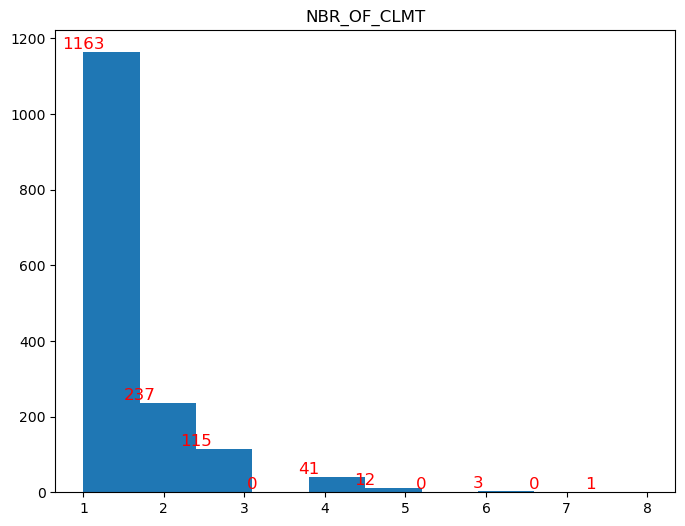

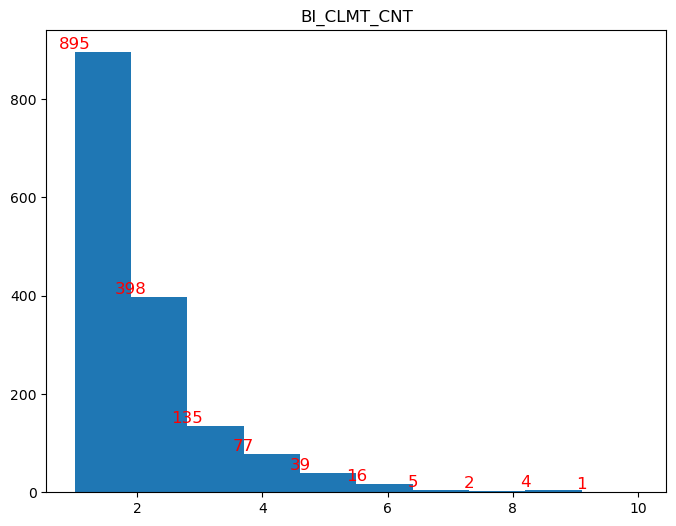

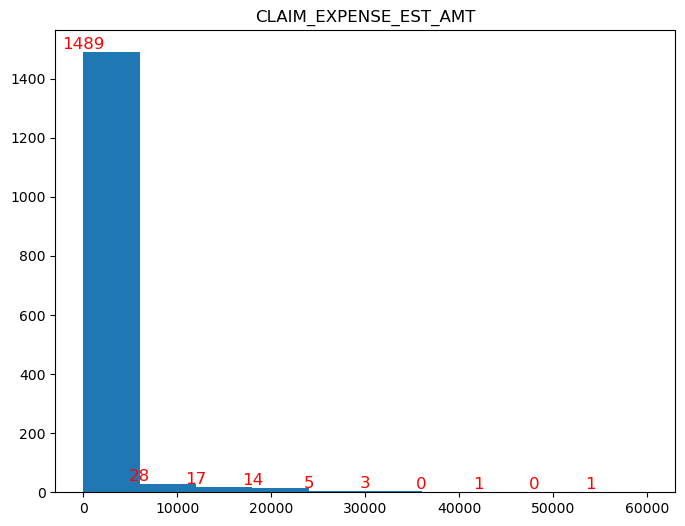

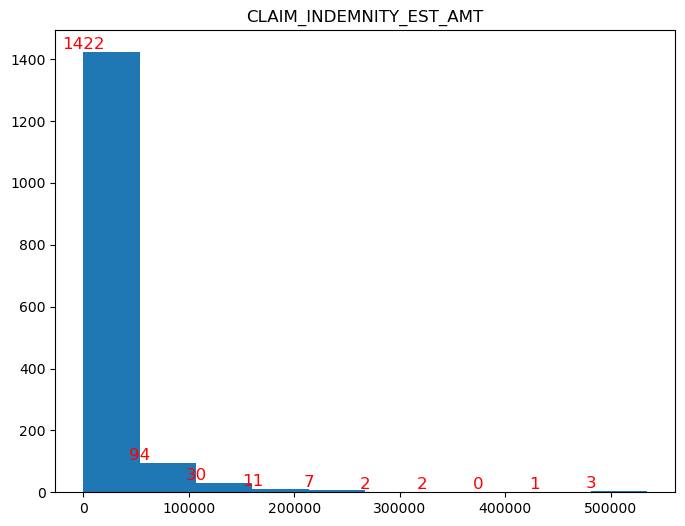

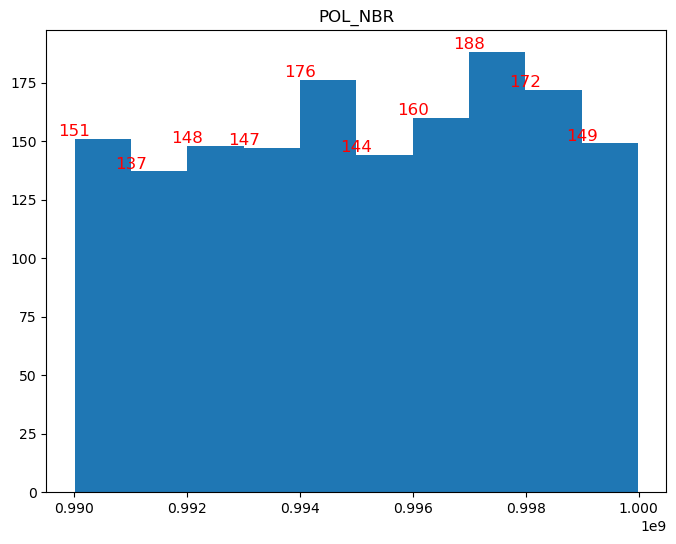

In [27]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and create a histogram
for col in num_cols:
    fig = plt.figure(figsize=(8, 6))
    ax = plt.hist(df2[col], bins=10)
    for i in range(len(ax[0])):
        plt.text(x = ax[1][i], y = ax[0][i], s = str(int(ax[0][i])), 
                 fontdict=dict(color='red',size=12),
                 ha='center', va='bottom')
    plt.title(col)
    plt.show()

## Creating Countplots for all my cateogrical variables

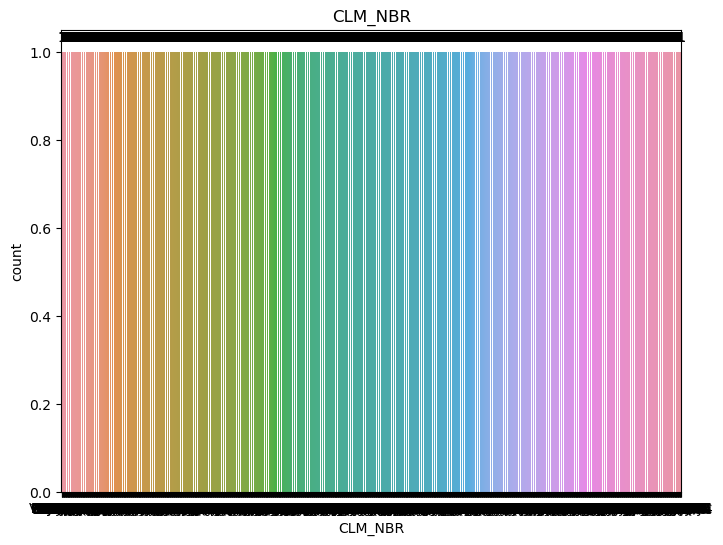

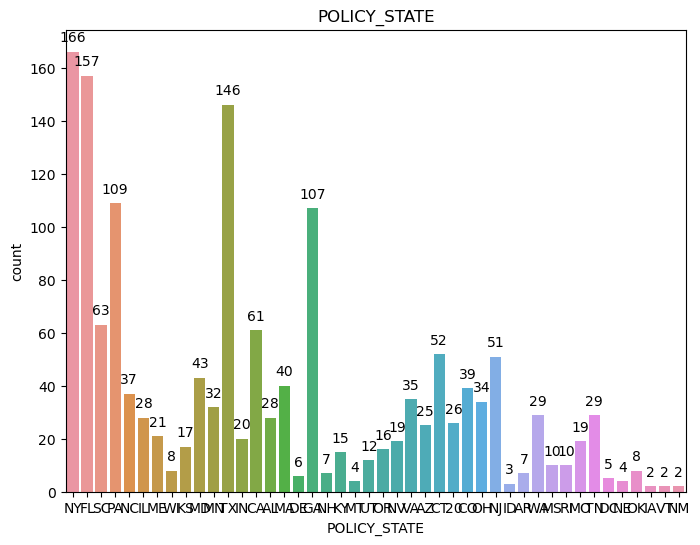

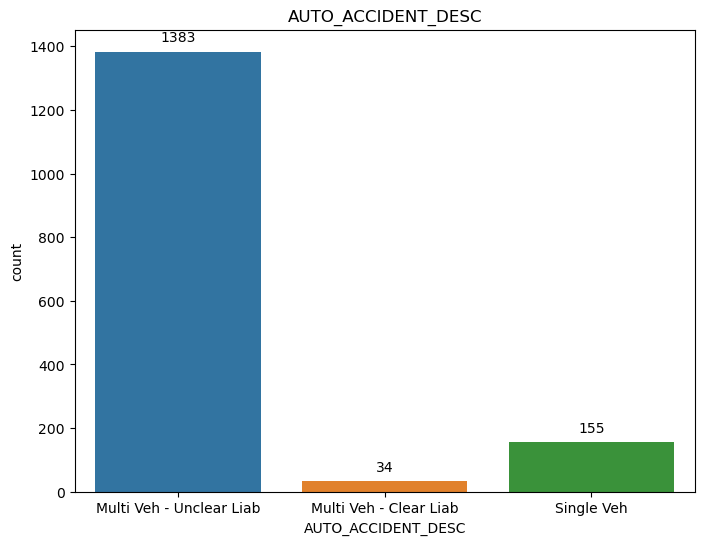

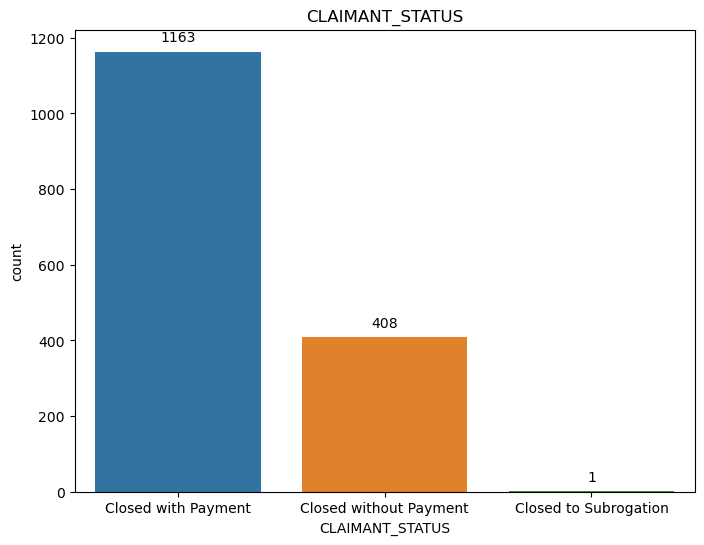

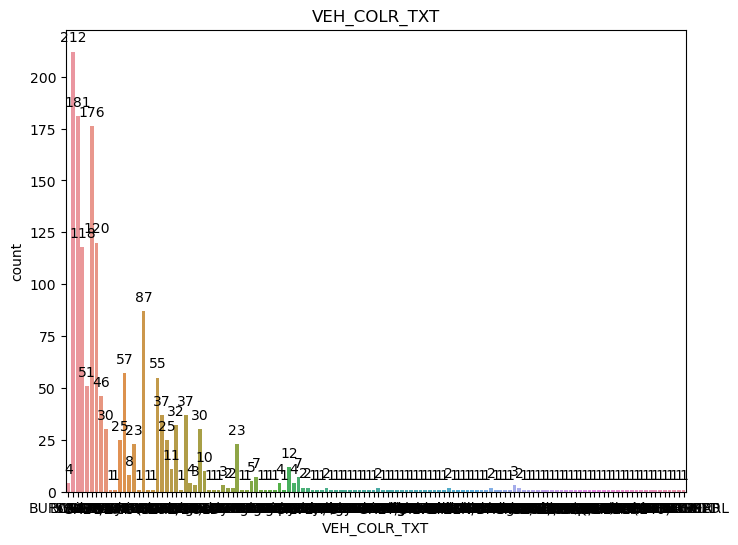

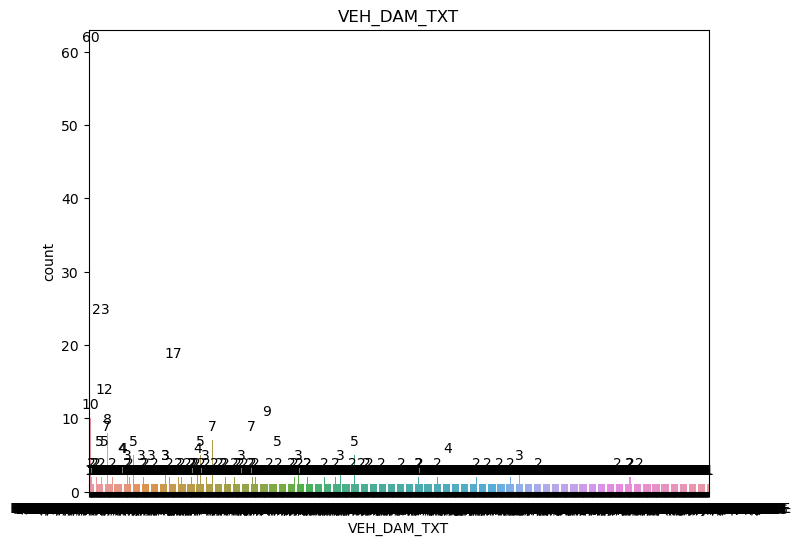

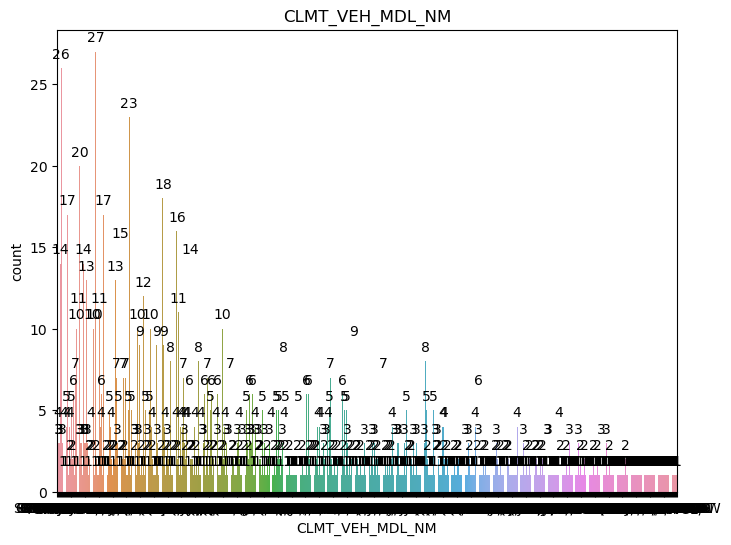

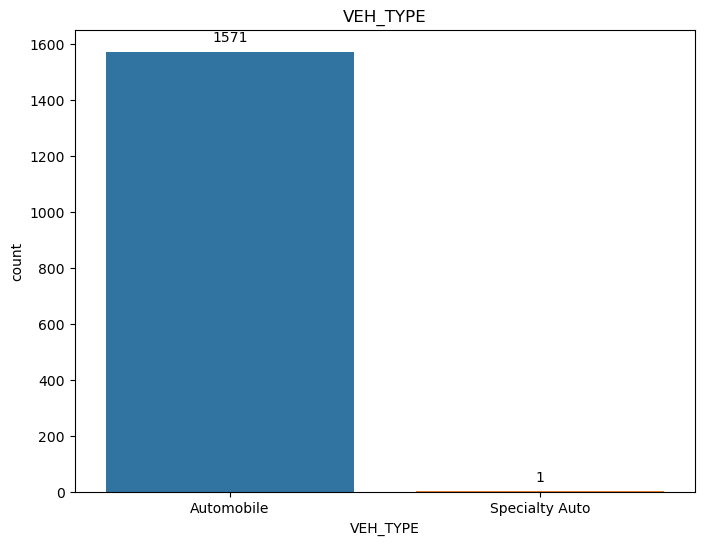

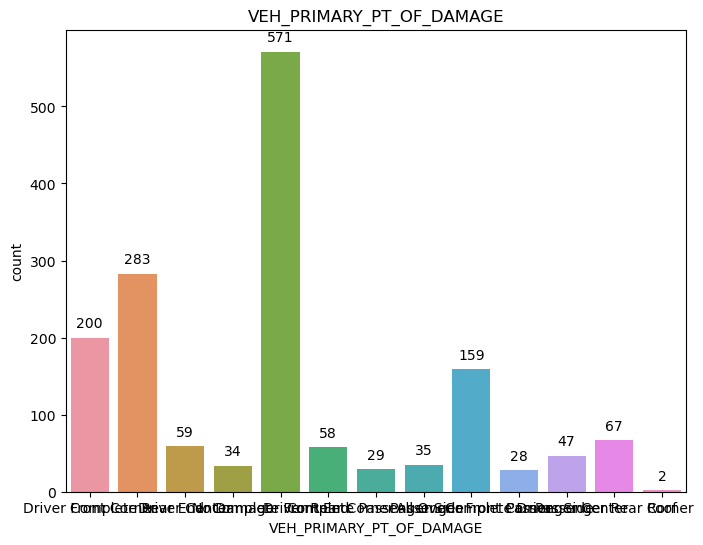

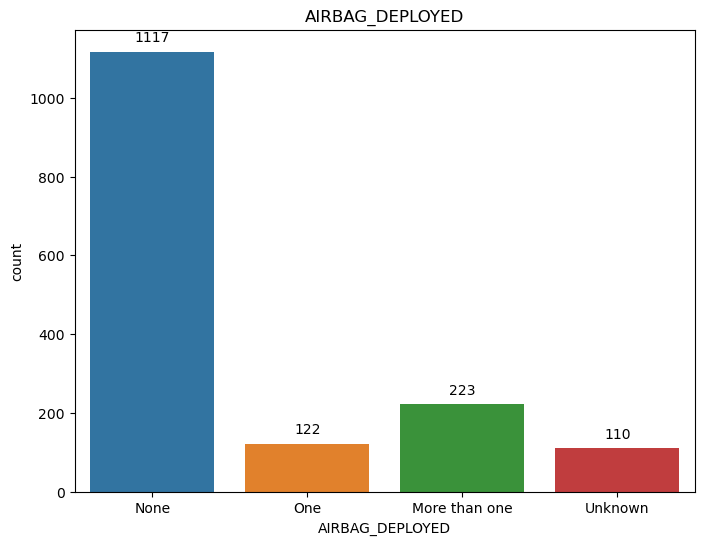

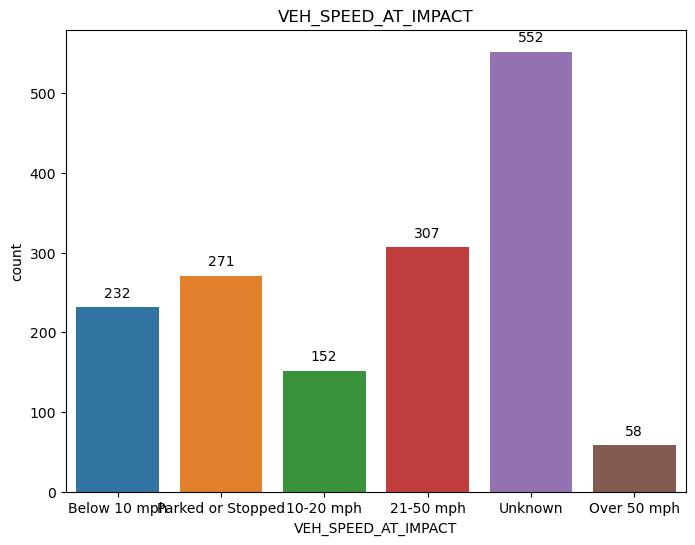

In [28]:
cat_cols = df2.select_dtypes(include=['object']).columns

# Loop through each categorical column and create a countplot
for col in cat_cols:
    fig = plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=col, data=df2)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.title(col)
    plt.show()

In [29]:
df2.to_excel('mergeddata.xlsx', index=False)